# DataViz
## Red Wine Quality - EDA and Data Visualization

Este notebook tem o objetivo de apresentar um simples EDA, porém focado na manipulação dos gráficos, tendo em vista
uma melhor montagem para apresentação das figuras


### Considerações:
- vários insights de manipulações dos gráficos foram tirados do [link](https://www.kaggle.com/joshuaswords/netflix-data-visualization)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines

## Resetando os defaults

In [2]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['figure.figsize'] = (10, 8)
for spine in ['left', 'top', 'right', 'bottom']:
    plt.rcParams[f'axes.spines.{spine}'] = False

## Input dos dados

In [3]:
ds_path = '../../datasets/kaggle/wine-quality-red/winequality-red.csv'
df = pd.read_csv(ds_path)
display(df.head())
df.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
percentiles = [.01, .1, .25, .5, .75, .9, .99]
df.describe(percentiles=percentiles).T.round(2)

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
fixed acidity,1599.0,8.32,1.74,4.60,5.20,6.50,7.10,7.90,9.20,10.70,13.30,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.19,0.31,0.39,0.52,0.64,0.74,1.02,1.58
citric acid,1599.0,0.27,0.19,0.00,0.00,0.01,0.09,0.26,0.42,0.52,0.70,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.40,1.70,1.90,2.20,2.60,3.60,8.31,15.50
chlorides,1599.0,0.09,0.05,0.01,0.04,0.06,0.07,0.08,0.09,0.11,0.36,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,3.00,5.00,7.00,14.00,21.00,31.00,50.02,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,8.00,14.00,22.00,38.00,62.00,93.20,145.00,289.00
density,1599.0,1.00,0.00,0.99,0.99,0.99,1.00,1.00,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,2.93,3.12,3.21,3.31,3.40,3.51,3.70,4.01
sulphates,1599.0,0.66,0.17,0.33,0.42,0.50,0.55,0.62,0.73,0.85,1.26,2.00


In [5]:
target = 'quality'

In [6]:
float_columns = [c for c in df if target not in c]
df[float_columns] = df[float_columns].apply(pd.to_numeric, downcast='float')
df[target] = df[target].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float32
 1   volatile acidity      1599 non-null   float32
 2   citric acid           1599 non-null   float32
 3   residual sugar        1599 non-null   float32
 4   chlorides             1599 non-null   float32
 5   free sulfur dioxide   1599 non-null   float32
 6   total sulfur dioxide  1599 non-null   float32
 7   density               1599 non-null   float32
 8   pH                    1599 non-null   float32
 9   sulphates             1599 non-null   float32
 10  alcohol               1599 non-null   float32
 11  quality               1599 non-null   int32  
dtypes: float32(11), int32(1)
memory usage: 75.1 KB


In [7]:
for c in df:
    print(f"Quantidade de valores únicos em {c.upper()}: {len(df[c].unique())}\n")

Quantidade de valores únicos em FIXED ACIDITY: 96

Quantidade de valores únicos em VOLATILE ACIDITY: 143

Quantidade de valores únicos em CITRIC ACID: 80

Quantidade de valores únicos em RESIDUAL SUGAR: 91

Quantidade de valores únicos em CHLORIDES: 153

Quantidade de valores únicos em FREE SULFUR DIOXIDE: 60

Quantidade de valores únicos em TOTAL SULFUR DIOXIDE: 144

Quantidade de valores únicos em DENSITY: 436

Quantidade de valores únicos em PH: 89

Quantidade de valores únicos em SULPHATES: 96

Quantidade de valores únicos em ALCOHOL: 65

Quantidade de valores únicos em QUALITY: 6



In [8]:
palette = sns.color_palette("rocket_r", n_colors=len(df[target].unique()))
cmap = sns.color_palette("rocket_r", as_cmap=True)
palette

[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

# Primeira comparação: gráficos de correlação linear

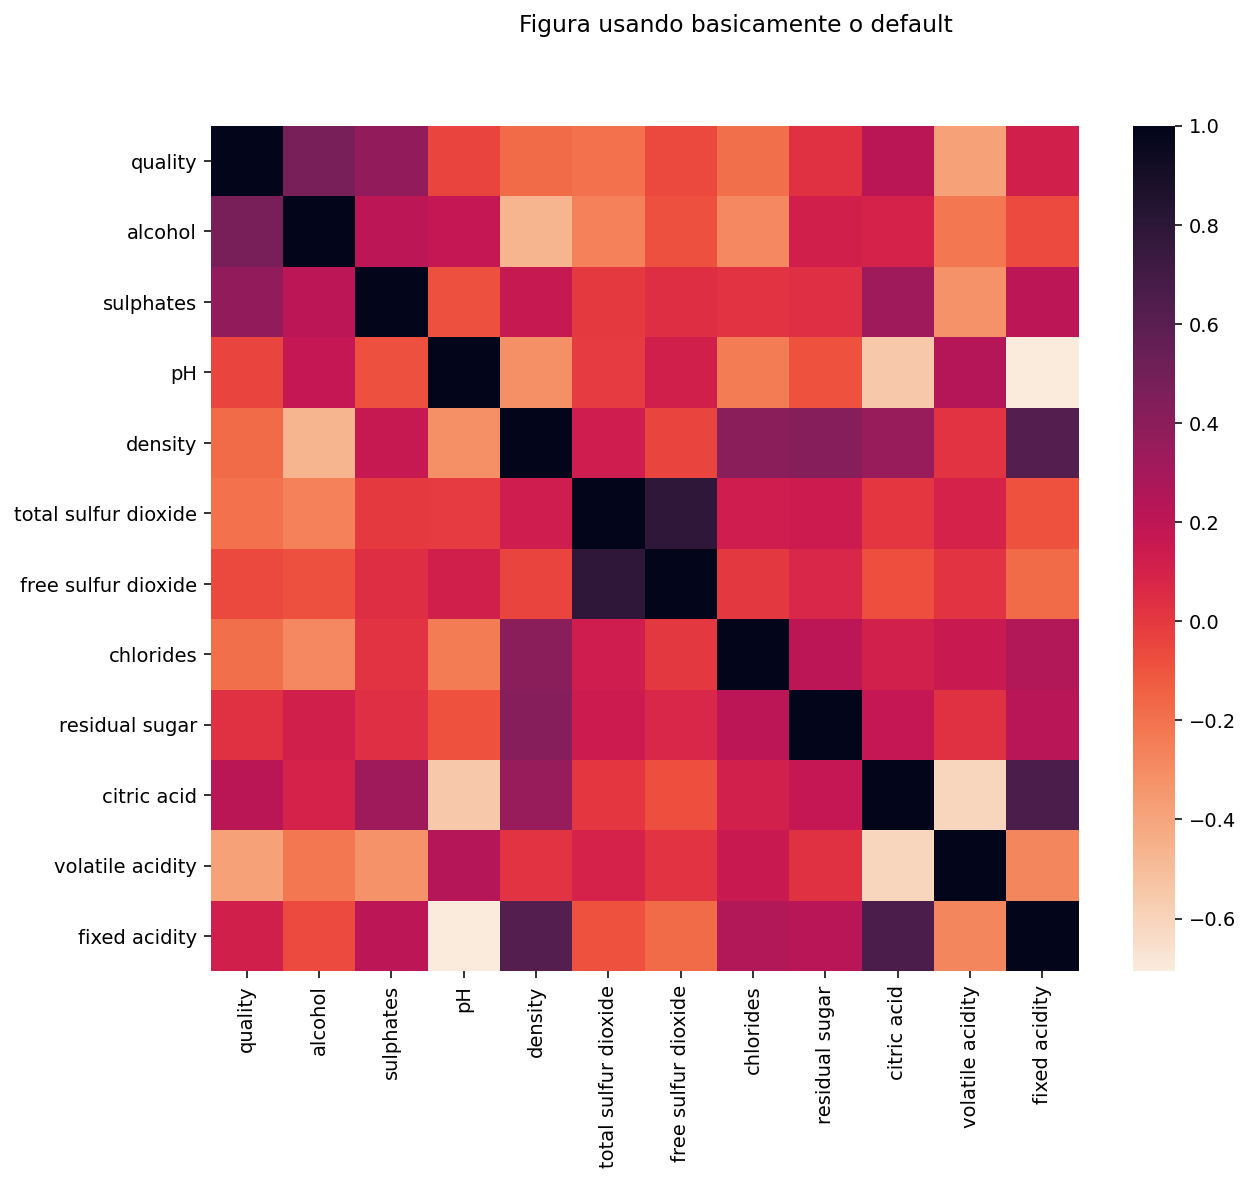

In [9]:
corr = df.iloc[:, ::-1].corr(method='spearman')
fig, ax = plt.subplots()
fig.suptitle('Figura usando basicamente o default')
sns.heatmap(
    corr, cmap=cmap,
);

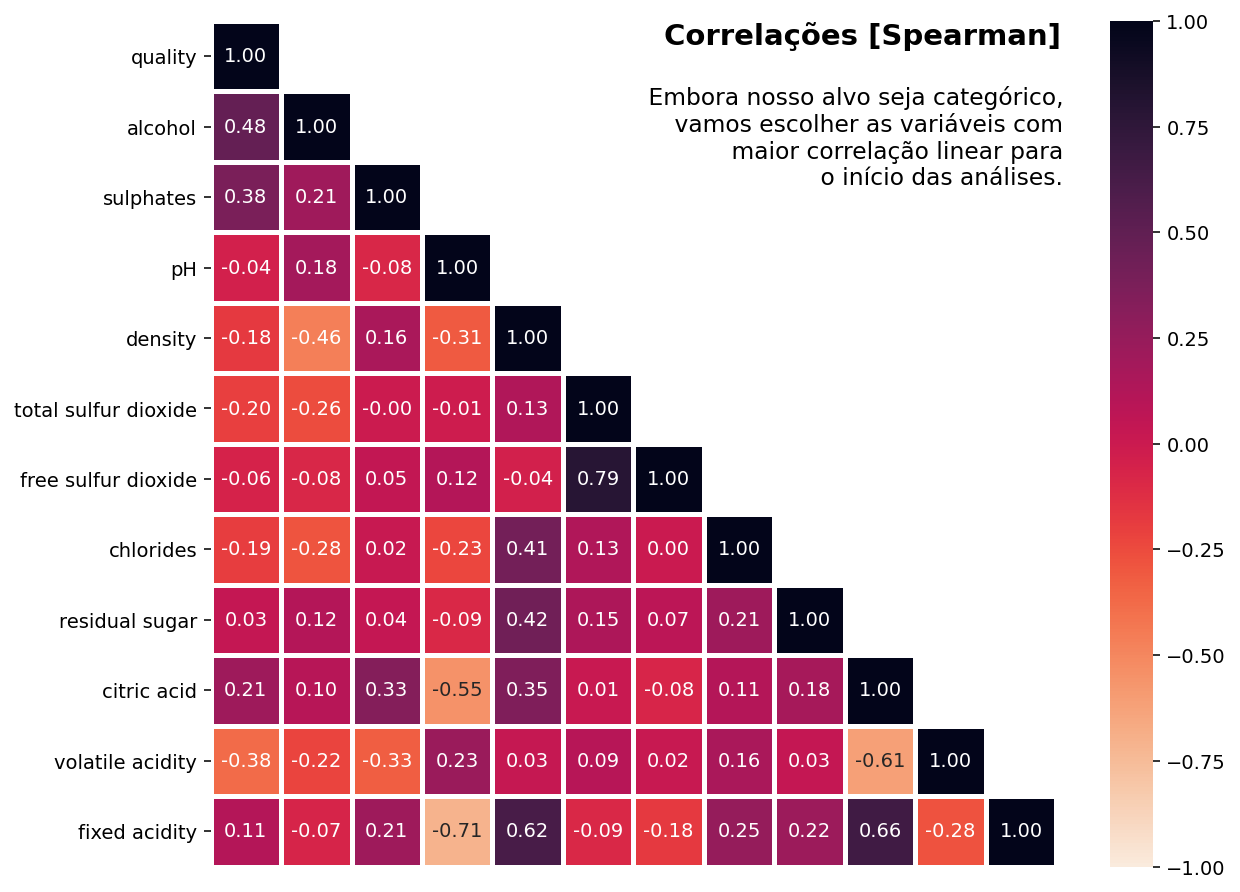

In [10]:
corr = df.iloc[:, ::-1].corr(method='spearman')
mask = np.triu(corr, k=1).astype(bool)
fig, ax = plt.subplots()
fig.text(x=.465, y=.859, s='Correlações [Spearman]', fontweight='bold', fontsize=15)
text = """
    Embora nosso alvo seja categórico,
    vamos escolher as variáveis com
    maior correlação linear para
    o início das análises.
    """
fig.text(x=.75, y=.71, s=text, fontsize=12, ha='right')
sns.heatmap(
    corr, mask=mask, cmap=cmap,
    vmax=1, vmin=-1, center=0,
    square=True, annot=True, fmt='.2f',
    linewidths=2.5, ax=ax, xticklabels=False,
);

# Segunda comparação: gráficos de boxplot

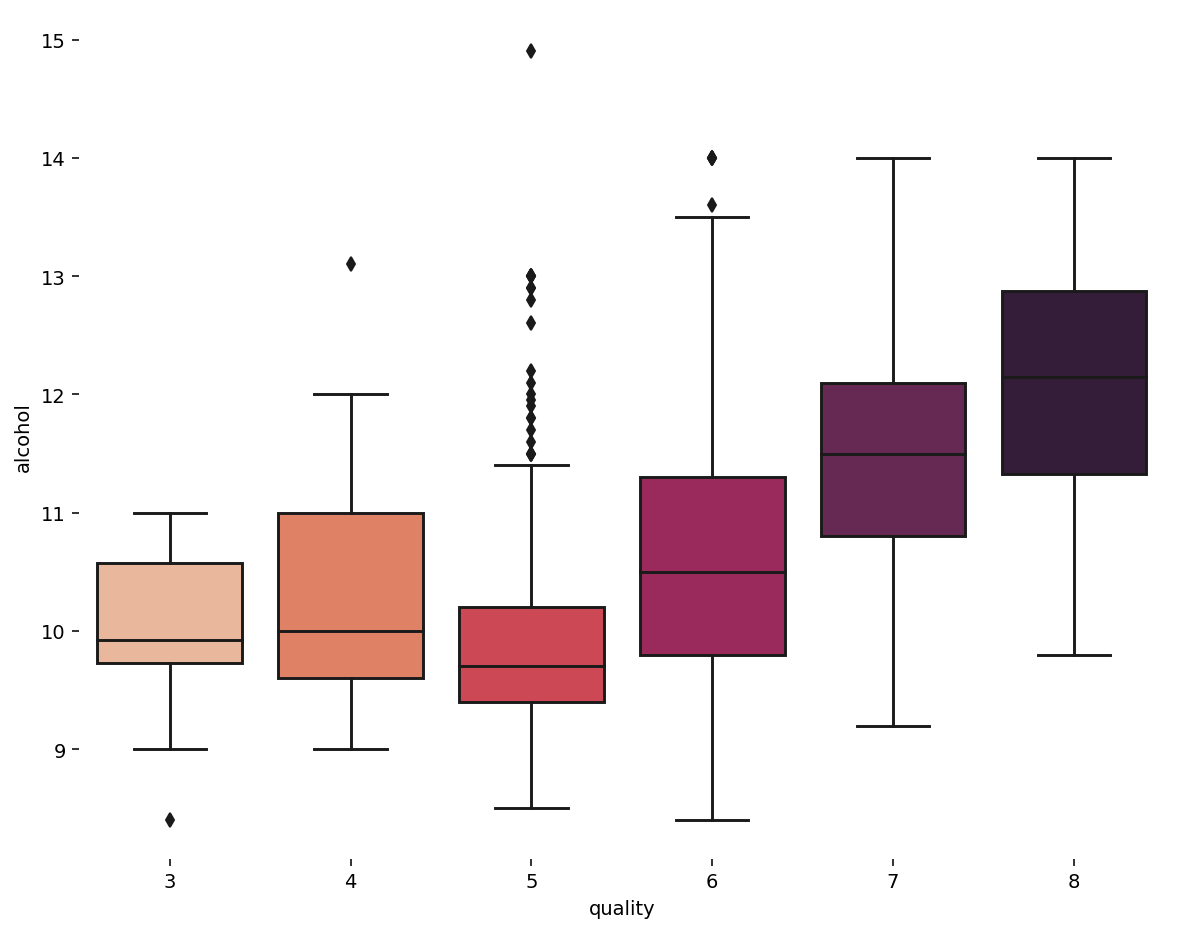

In [11]:
to_analyse = df[[target, 'alcohol']]
fig, ax = plt.subplots()
sns.boxplot(x=target, y='alcohol', data=to_analyse, ax=ax, palette=palette);

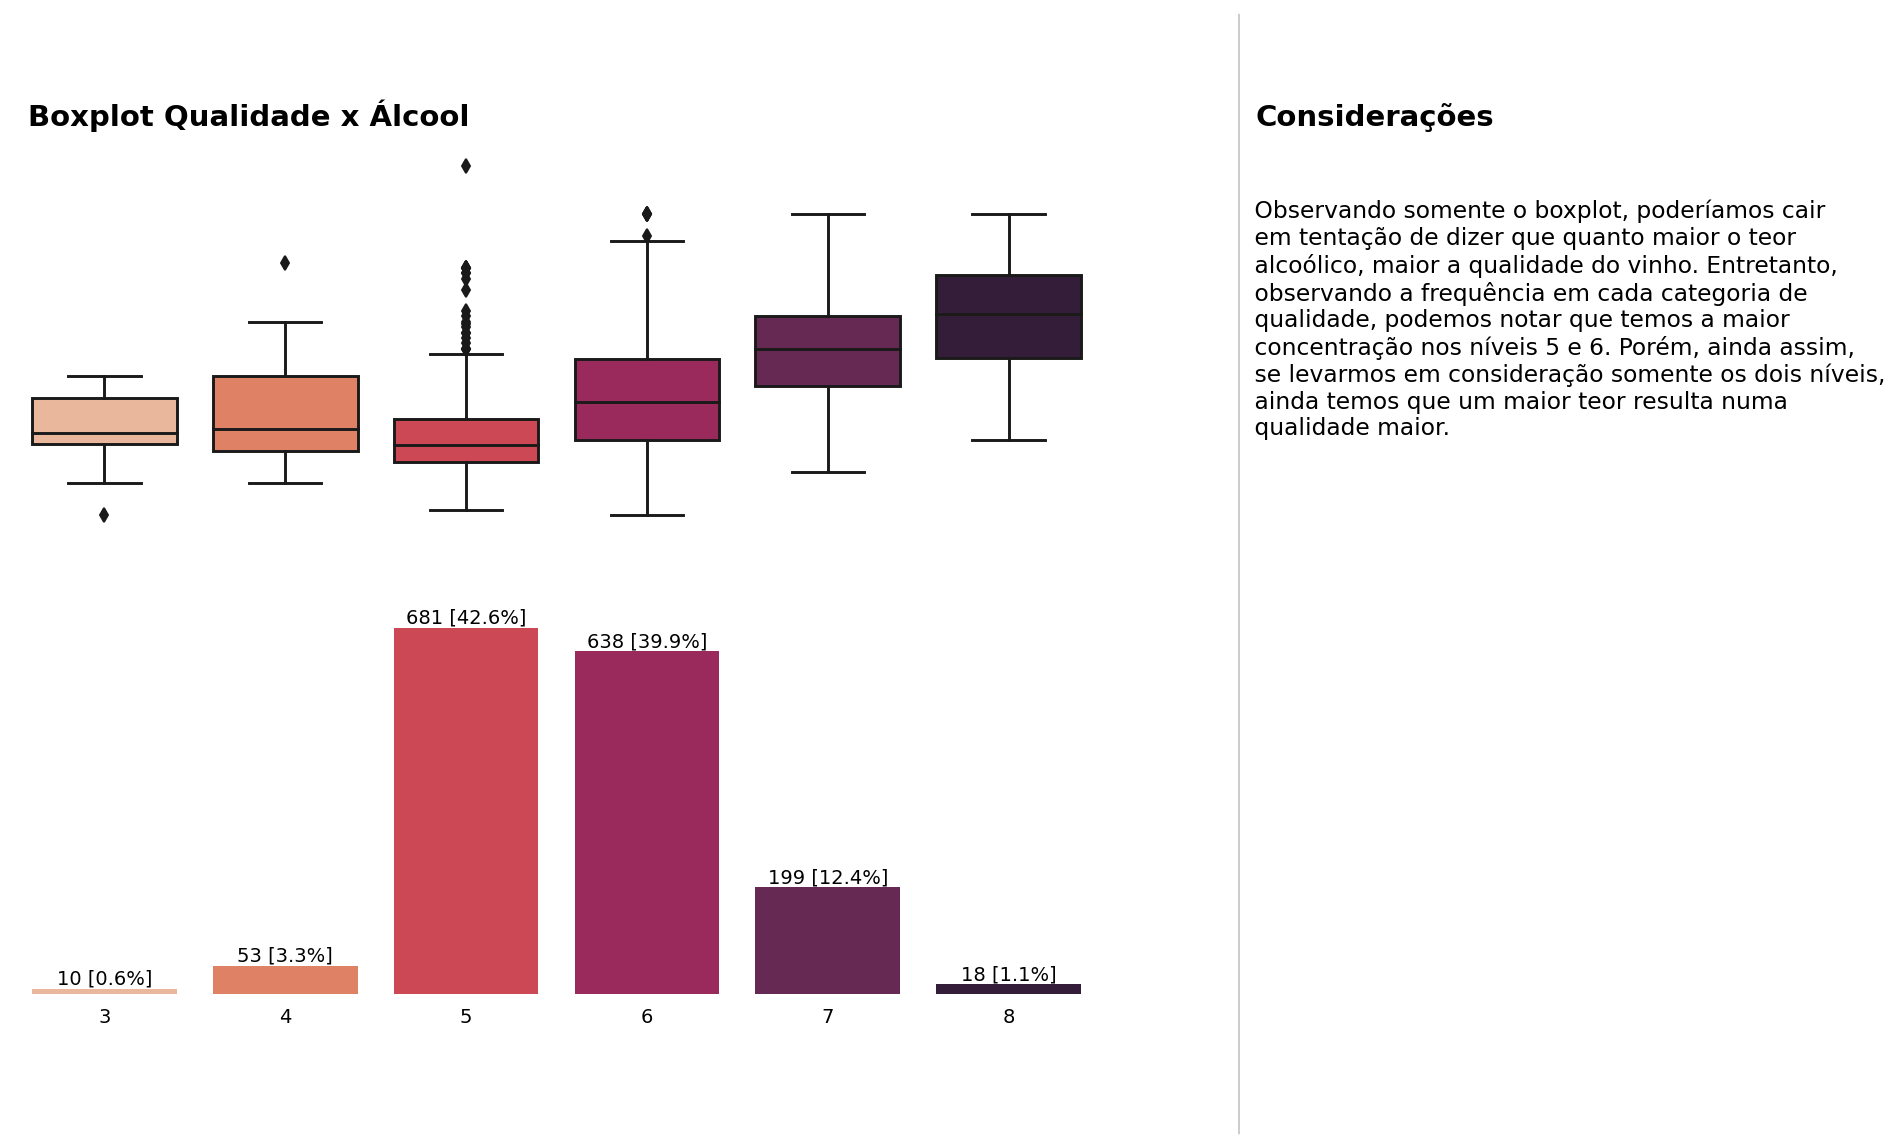

In [12]:
to_analyse = df[[target, 'alcohol']]
fig, axes = plt.subplots(2, 1)
fig.text(x=.135, y=.9, s='Boxplot Qualidade x Álcool', fontweight='bold', fontsize=15)

sns.boxplot(x=target, y='alcohol', data=to_analyse, ax=axes[0], palette=palette)
axes[0].set_yticks([])
axes[0].set_xticks([])
axes[0].set_ylabel('')
axes[0].set_xlabel('')

sns.countplot(target, data=to_analyse, ax=axes[1], palette=palette)
axes[1].grid(axis='y', linestyle='-', alpha=0.4)
axes[1].set_yticks([])
axes[1].set_ylabel('')
axes[1].set_xlabel('')
axes[1].xaxis.set_ticks_position('none') 
ncount = len(df)
for p in axes[1].patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    axes[1].annotate(f'{int(y)} [{(100. * y / ncount):.1f}%]', (x.mean(), y), 
            ha='center', va='bottom')
    
fig.text(x=1.0115, y=.9, s='Considerações', fontweight='bold', fontsize=15)
text = """
    Observando somente o boxplot, poderíamos cair
    em tentação de dizer que quanto maior o teor
    alcoólico, maior a qualidade do vinho. Entretanto,
    observando a frequência em cada categoria de
    qualidade, podemos notar que temos a maior
    concentração nos níveis 5 e 6. Porém, ainda assim,
    se levarmos em consideração somente os dois níveis,
    ainda temos que um maior teor resulta numa
    qualidade maior.
    """
fig.text(x=.99, y=.6, s=text, fontsize=12, ha='left')

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black', lw=0.2)
fig.lines.extend([l1])